# Fitting a line 

Illustrationscode zum line fitting-Problem: Wir erzeugen zweidimensionale Beispieldaten und legen eine Gerade durch. Gelöst wird dabei das lineare Programm:

$$
	\begin{array}{lll}
	\min & \sum_{i=1}^n\epsilon_i,           &  a,b,\epsilon_1,\ldots,\epsilon_n\in\mathbb R \\
	\textrm{unter} & \epsilon_i\geq ap_i+b-q_i &\text{für }i=1,\ldots,n\\
	 & \epsilon_i\geq -(ap_i+b-q_i) &\text{für }i=1,\ldots,n %\\
	 %& \epsilon_i\geq 0&\text{für }i=1,\ldots,n
	\end{array}
$$
wobei $(p_1,q_1),\ldots,(p_n,q_n)$ die gegebenen Datenpunkte sind.

numpy ist die Standard-Bibliothek für wissenschaftliches Rechnen, wie immer installierbar per 'pip'. Google colab hat numpy vorinstalliert. 
Dokumentation findet sich auf der numpy-Seite: https://numpy.org


In [1]:
# Zum Installieren in google colab, entfernen Sie die Raute in der nächsten Zeile
#!pip install mip

import mip         
import numpy as np 
import matplotlib.pyplot as plt  # graphics library
plt.style.use("seaborn")  # damit die plots ein wenig hübscher aussehen

Wir erzeugen die Testdaten: linearer Zusammenhang plus (normal-verteiltes) Rauschen. Dazu nehmen wir eine Gerade $y = 1.3x+2$, wählen zufällige $x$-Werte zwischen 0 und 1, berechnen $y$ und addieren normal-verteiltes Rauschen.


In [2]:
N=40
A,B=1.3,2
p=np.random.random_sample(N)    # N gleichverteilte Punkte aus [0,1]
q=A*p+B+np.random.randn(N)*0.1  # N Werte normal-verteilten Rauschens

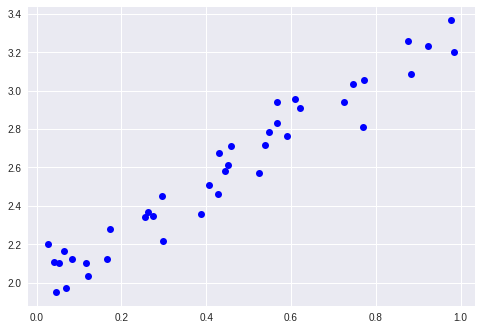

In [3]:
plt.plot(p,q,'bo')  # 'bo' gibt Farbe und Art des Plots an, 'b' für blue und 'o' für Kreismarker

Jetzt erstellen wir das lineare Programm. Das model wird erzeugt, sowie die Variablen $a,b\in\mathbb R$. Für beide Variablen wird als untere Schanke $-\infty$ festgelegt. Das ist nötig, da standardmäßig die untere Schranke bei $0$ liegt. Dies geschieht mit dem Parameter lb wie *lower bound*.

In [4]:
m=mip.Model()
a=m.add_var(lb=-np.inf)
b=m.add_var(lb=-np.inf)

Wir fügen nun die Variablen für den Fehler hinzu.
Um beliebig viele Variablen zu erzeugen, nutzt man am besten die list comprehension-Syntax in python.

$\epsilon_i\geq 0, i=1,\ldots N$

In [5]:
eps=[m.add_var(lb=0) for i in range(N)]

Als nächstes die Zielfunktion. Dafür nutzen wir den Summenoperator von mip.

$\min \sum_{i=1}^N\epsilon_i$

In [6]:
m.objective=mip.minimize(mip.xsum(e for e in eps))

Wir erzeugen die Nebenbedingungen:

$\epsilon_i\geq ap_i+b-q_i$

$\epsilon_i\geq -(ap_i+b-q_i)$

In [7]:
for i in range(N):
    m+= a*p[i]+b-q[i] <= eps[i]
    m+= -(a*p[i]+b-q[i]) <= eps[i]

Wir lösen das lineare Programm. Die Rückgabe zeigt an, dass das LP optimal gelöst wurde.

In [8]:
m.optimize()

<OptimizationStatus.OPTIMAL: 0>

Wir plotten nun noch einmal mit der gefitteten Gerade.

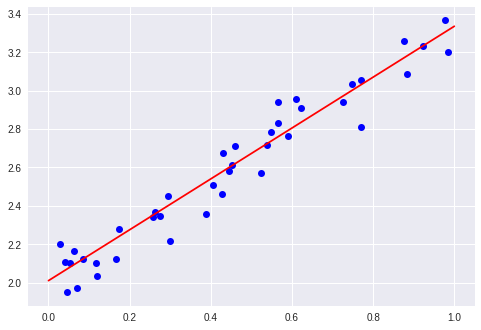

In [9]:
plt.plot(p,q,'bo')
x=np.linspace(0,1,100)     # np.linspace gibt hier 100 äquidistante Punkte zwischen 0 und 1 zurück
# Wieder erhalten wir die optimalen Werte der Variablen, in dem wir ein ".x" an die Variablen dranhängen
# Damit wird die fit-Gerade durch a.x,b.x beschrieben
plt.plot(x,a.x*x+b.x,'r-') # 'r-' Linienplot in rot

In [10]:
print("Wahre Werte: a={}, b={}".format(A,B))
print("fit: a={}, b={}".format(a.x,b.x))

Wahre Werte: a=1.3, b=2
fit: a=1.3249104496683912, b=2.0106089401805813


Man vergleiche dies mit den _wahren_ Werten A,B oben.